In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = sp.symbols('t', real=True)
x = sp.Function('x')
gamma, omega_0, F_0, omega_d = sp.symbols('gamma omega_0 F_0 omega_d', real=True, positive=True)
x0, v0 = sp.symbols('x0 v0', real=True)

In [3]:
# wymuszenie
e1 = sp.Eq(x(t).diff(t, t) + omega_0**2 * x(t), F_0 * sp.cos(omega_d * t)) 
e1

Eq(omega_0**2*x(t) + Derivative(x(t), (t, 2)), F_0*cos(omega_d*t))

In [4]:
# tlumienie
e2 = sp.Eq(x(t).diff(t, t) + 2 * gamma * x(t).diff(t) + omega_0**2 * x(t), 0) 
e2

Eq(2*gamma*Derivative(x(t), t) + omega_0**2*x(t) + Derivative(x(t), (t, 2)), 0)

In [5]:
# tlumienie z wymuszeniem
e3 = sp.Eq(x(t).diff(t, t) + 2 * gamma * x(t).diff(t) + omega_0**2 * x(t), F_0 * sp.cos(omega_d * t)) 
e3

Eq(2*gamma*Derivative(x(t), t) + omega_0**2*x(t) + Derivative(x(t), (t, 2)), F_0*cos(omega_d*t))

In [6]:
s1 = sp.dsolve(e1, x(t), ics={x(0): x0, x(t).diff(t).subs(t,0): v0})
s2 = sp.dsolve(e2, x(t), ics={x(0): x0, x(t).diff(t).subs(t,0): v0})
s3 = sp.dsolve(e3, x(t), ics={x(0): x0, x(t).diff(t).subs(t,0): v0})

In [7]:
p1 = {omega_0: 1, F_0: 1, omega_d: 0.9, x0: 1, v0: 0}
p2 = {omega_0: 1, gamma: 0.05, x0: 1, v0: 0}
p3 = {omega_0: 1, gamma: 0.1, F_0: 1, omega_d: 1, x0: 1, v0: 0}

In [8]:
t_values = np.linspace(0, 100, 1000)
y1 = sp.lambdify(t, s1.rhs.subs(p1))(t_values)
y2 = sp.lambdify(t, s2.rhs.subs(p2))(t_values)
y3 = sp.lambdify(t, s3.rhs.subs(p3))(t_values)

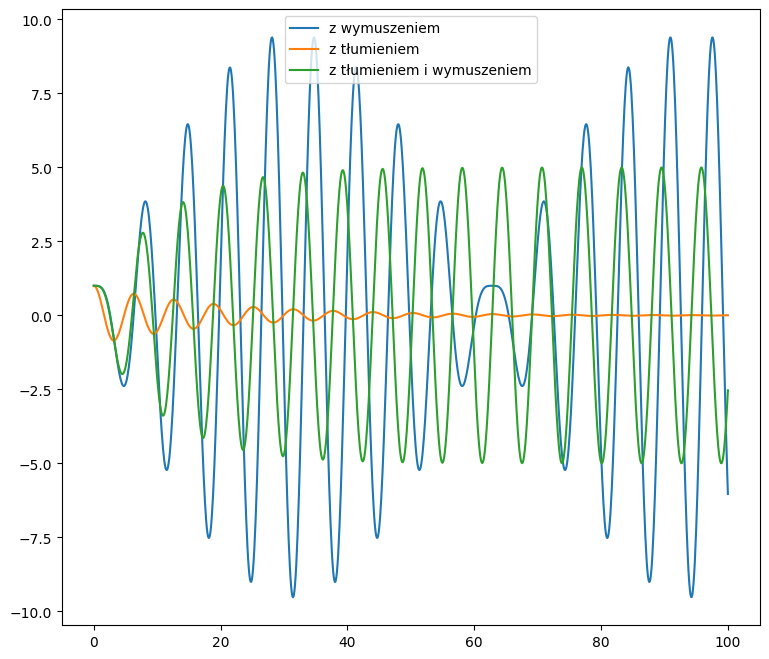

In [9]:
plt.figure(figsize=(9,8))
plt.plot(t_values, y1.real, label='z wymuszeniem')
plt.plot(t_values, y2.real, label='z tłumieniem')
plt.plot(t_values, y3.real, label='z tłumieniem i wymuszeniem')
plt.legend()
plt.show()